In [24]:
%matplotlib notebook
import numpy as np
import pandas as pd
import folium
import matplotlib.pyplot as plt
from folium.plugins import MarkerCluster
import branca.colormap as cm
from ipywidgets import widgets

Определитесь, в каком виде вы хотите представить ваш проект. Мы предлагаем вам сделать интерактивное демо, содержащее:

- карты с визуализацией реального и прогнозируемого спроса на такси в выбираемый пользователем момент времени
- временной ряд фактического и прогнозируемого спроса на такси в выбираемой области.

In [25]:
#Загружаем данные о зонах
regions = pd.read_csv('regions.csv', sep=';')

In [26]:
# Границы Нью-Йорка
ny_west = -74.25559
ny_east = -73.70001
ny_south = 40.49612
ny_north = 40.91553
ny_center = [(ny_north+ny_south)/2,(ny_east+ny_west)/2]
print 'Координаты центра Нью-Йорка: {}, {}'.format(ny_center[0],ny_center[1])

Координаты центра Нью-Йорка: 40.705825, -73.9778


In [27]:
top_regions = [1075., 1076., 1077., 1125., 1126., 1127., 1128., 1129., 1130.,
       1131., 1132., 1172., 1173., 1174., 1175., 1176., 1177., 1178.,
       1179., 1180., 1181., 1182., 1183., 1184., 1221., 1222., 1223.,
       1224., 1225., 1227., 1228., 1229., 1230., 1231., 1232., 1233.,
       1234., 1235., 1272., 1273., 1274., 1278., 1279., 1280., 1281.,
       1282., 1283., 1284., 1285., 1286., 1287., 1326., 1327., 1331.,
       1332., 1333., 1334., 1335., 1336., 1337., 1338., 1339., 1376.,
       1377., 1378., 1380., 1382., 1383., 1384., 1385., 1386., 1387.,
       1388., 1389., 1390., 1426., 1431., 1434., 1435., 1436., 1437.,
       1438., 1439., 1441., 1442., 1480., 1482., 1483., 1530., 1532.,
       1533., 1580., 1630., 1684., 1733., 1734., 1783., 2068., 2069.,
       2118., 2119., 2168.]
top_regions = map(int,top_regions)

In [28]:
cluster_usuals = [1530, 1282, 1227, 1333, 1174, 2068, 1128, 1387, 1272, 1441]

In [29]:
c0 = [1480, 1482, 1483, 1530, 1580, 1630]
c1 = [1075, 1125, 1126, 1131, 1179, 1180, 1231, 1233,
    1234, 1281, 1282, 1283, 1338, 1382, 1684, 1733,
    1783]
c2 = [1130, 1176, 1177, 1227, 1228, 1278, 1326, 1327,
    1376, 1377, 1378, 1426, 1532, 1533]
c3 = [1076, 1077, 1132, 1181, 1183, 1184, 1235, 1279,
    1280, 1284, 1285, 1286, 1287, 1331, 1332, 1333,
    1334, 1335, 1336, 1337, 1383, 1384, 1385, 1386,
    1434]
c4 = [1172, 1173, 1174, 1175, 1225]
c5 = [1734, 2068, 2069, 2118, 2119, 2168]
c6 = [1127, 1128, 1129, 1178, 1182, 1224, 1229, 1230,
    1232, 1380]
c7 = [1339, 1387, 1388, 1389, 1431, 1435, 1436, 1437,
       1438, 1439]
c8 = [1221, 1222, 1223, 1272, 1273, 1274]
c9 = [1390, 1441, 1442]
clusters_list = [c0,c1,c2,c3,c4,c5,c6,c7,c8,c9]

In [30]:
t_regions = regions[regions.region.isin(top_regions)].reset_index(drop=True)

In [31]:
def pltclust(cluster=0):
    m = folium.Map(location = ny_center, zoom_start=11)
    selected_regions = t_regions[t_regions.region.isin(clusters_list[cluster])].reset_index(drop=True)
#    print selected_regions
    for i in range(selected_regions.shape[0]):
        upper_left = (selected_regions.north[i],selected_regions.west[i])
        upper_right = (selected_regions.north[i],selected_regions.east[i])
        lower_left = (selected_regions.south[i],selected_regions.west[i])
        lower_right = (selected_regions.south[i],selected_regions.east[i])
        weight=0
        edges = [upper_left, upper_right, lower_right, lower_left, upper_left]

        folium.features.PolygonMarker(locations=edges, fill_color='red', weight=weight).add_to(m)
        
    display(m)

На 3 неделе мы разбивали регионы на кластеры, на карте ниже можно посмотреть, как эти кластеры были распределены

In [32]:
widgets.interact(pltclust,cluster=(0,9,1))

aW50ZXJhY3RpdmUoY2hpbGRyZW49KEludFNsaWRlcih2YWx1ZT0wLCBkZXNjcmlwdGlvbj11J2NsdXN0ZXInLCBtYXg9OSksIE91dHB1dCgpKSwgX2RvbV9jbGFzc2VzPSh1J3dpZGdldC1pbnTigKY=


<function __main__.pltclust>

In [33]:
sarima_predicts = pd.read_csv('june_predicts.csv', parse_dates=['date'])

In [34]:
sarima_predicts.hour = pd.to_timedelta(sarima_predicts.hour.astype(int), unit='H')

In [35]:
sarima_predicts['time'] = sarima_predicts.date + sarima_predicts.hour

In [36]:
regr_predicts = pd.read_csv('predictions_june_regr.csv', parse_dates=['time'])

In [37]:
sarima_predicts = sarima_predicts[['time','region','n','pred']]
regr_predicts = regr_predicts[['time','region','n','pred','obs']]

In [38]:
sarima_predicts.rename(columns = {'pred':'s_pred'}, inplace=True)

In [39]:
all_predicts = pd.merge(regr_predicts,sarima_predicts, how = 'left' , on = ['time','region','n'])

In [40]:
def pltts(region = 1075, n=1):
    temp = all_predicts[(all_predicts.n == n) & 
                         (all_predicts.region == region)]
    plt.figure(figsize=(16,8))
    plt.subplot(211)
    plt.plot(temp.time, temp.obs)
    plt.plot(temp.time, temp.pred, color = 'red')
    plt.subplot(212)
    plt.plot(temp.time, temp.obs)
    plt.plot(temp.time, temp.s_pred, color = 'black')
    plt.show()

На графиках ниже сравнительные графики наблюдаемых данных и предсказаний регрессионной модели и модели SARIMAX для каждого региона

aW50ZXJhY3RpdmUoY2hpbGRyZW49KERyb3Bkb3duKGRlc2NyaXB0aW9uPXUncmVnaW9uJywgb3B0aW9ucz0oMTA3NSwgMTA3NiwgMTA3NywgMTEyNSwgMTEyNiwgMTEyNywgMTEyOCwgMTEyOSzigKY=


<function __main__.pltts>

<IPython.core.display.Javascript object>


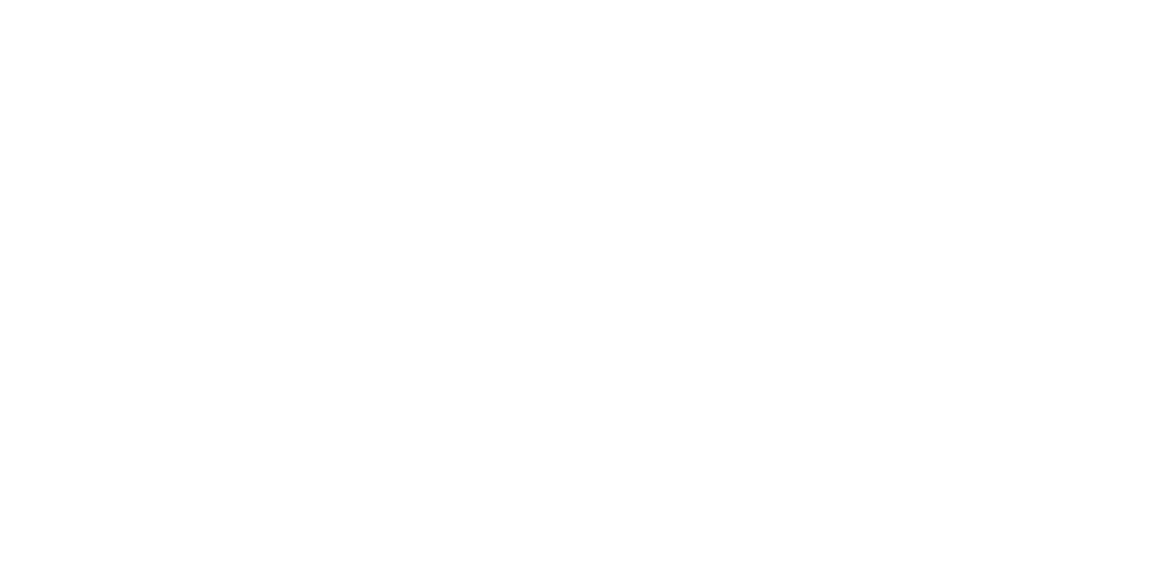

In [41]:
widgets.interact(pltts,n=(1,6,1), region=top_regions)

In [42]:
start_june = pd.Timestamp('2016-05-31 23:00:00')
end_june = pd.Timestamp('2016-06-30 17:00:00')
dates = pd.date_range(start_june, end_june, freq='H').to_pydatetime()

In [20]:
Cmap = cm.linear.YlOrRd_04.scale(min(all_predicts.obs),max(all_predicts.obs))

In [43]:
def pltmap(date,n=1):
    o = folium.Map(location = ny_center, zoom_start=11)
    d = folium.Map(location = ny_center, zoom_start=11)
    selected_regions = t_regions[t_regions.region.isin(top_regions)].reset_index(drop=True)
    temp = all_predicts[(all_predicts.time == date) & (all_predicts.n == n)].reset_index(drop=True)
#    print selected_regions
    for i in range(selected_regions.shape[0]):
        upper_left = (selected_regions.north[i],selected_regions.west[i])
        upper_right = (selected_regions.north[i],selected_regions.east[i])
        lower_left = (selected_regions.south[i],selected_regions.west[i])
        lower_right = (selected_regions.south[i],selected_regions.east[i])
        weight=0
        edges = [upper_left, upper_right, lower_right, lower_left, upper_left]

        folium.features.PolygonMarker(locations=edges, fill_color=Cmap(temp.obs[i]), weight=weight).add_to(o)
        
        Cmap.caption = u'Среднее количество поездок из зоны в час (Наблюдаемое)'
        Cmap.add_to(o)    
    
    for i in range(selected_regions.shape[0]):
        upper_left = (selected_regions.north[i],selected_regions.west[i])
        upper_right = (selected_regions.north[i],selected_regions.east[i])
        lower_left = (selected_regions.south[i],selected_regions.west[i])
        lower_right = (selected_regions.south[i],selected_regions.east[i])
        weight=0
        edges = [upper_left, upper_right, lower_right, lower_left, upper_left]

        folium.features.PolygonMarker(locations=edges, fill_color=Cmap(temp.pred[i]), weight=weight).add_to(d)
        
#        Cmap.caption = u'Среднее количество поездок из зоны в час (Расчетное)'
#        Cmap.add_to(s)
    
    display(o,d)

На картах ниже представлено сравнение для наблюдаемых значений и значений полученных при помощи регрессионной модели для каждого горизона событий в июне 2016

In [44]:
widgets.interact(pltmap,date=dates,n=(1,6,1))

aW50ZXJhY3RpdmUoY2hpbGRyZW49KERyb3Bkb3duKGRlc2NyaXB0aW9uPXUnZGF0ZScsIG9wdGlvbnM9KGRhdGV0aW1lLmRhdGV0aW1lKDIwMTYsIDUsIDMxLCAyMywgMCksIGRhdGV0aW1lLmTigKY=


<function __main__.pltmap>